In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def pos(x):
    
    y = x.copy()
    y[x > 0] = x[x > 0]
    y[x <=0] = 0
    
    return y

In [4]:
def gamma(x):
    a =   pos(x + 2)**3
    b = 4*pos(x + 1)**3
    c = 6*pos(x)**3
    d = 4*pos(x - 1)**3
    e =   pos(x - 2)**3

    f = 0.25 * (a - b + c - d + e)

    return f

In [5]:
def final_basis_normal(i, x, h, N, x_0):
    
    if (0 <= i <= N-1):
        a =   pos((x-x_0)/h - (i - 2))**3
        b = 4*pos((x-x_0)/h - (i - 1))**3
        c = 6*pos((x-x_0)/h - (i - 0))**3
        d = 4*pos((x-x_0)/h - (i + 1))**3
        e =   pos((x-x_0)/h - (i + 2))**3

        f = 0.25 * (a - b + c - d + e)

        if i == 0:
            f += pos(1 - (x - x_0)/h)**3/4
        
        if i == (N - 1):
            f += pos((x - x_0)/h - (N-2))**3/4
        
        f[x < x_0] = 0
        
    return f

In [6]:
x, dx = np.linspace(-6, 6, 10_000, retstep=True)
y = gamma(x)

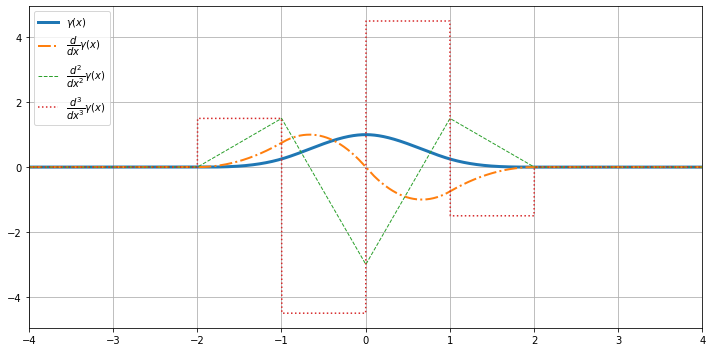

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, y, lw=3)
ax.plot(x[1:], np.diff(y, n=1)/dx, ls="-.", lw=2)
ax.plot(x[2:], np.diff(y, n=2)/dx**2, ls="--", lw=1)
ax.plot(x[3:], np.diff(y, n=3)/dx**3, ls=":")

ax.legend([r"$\gamma(x)$", 
           r"$ \dfrac{d}{dx} \gamma(x)$",
          r"$ \dfrac{d^2}{dx^2} \gamma(x)$",
          r"$ \dfrac{d^3}{dx^3} \gamma(x)$"], loc="upper left", fontsize=10)

ax.grid()
ax.set_xlim([-4, 4])
fig.tight_layout()
plt.show()

In [8]:
#fig.savefig("../images/cubic_compact_support_basis")

# All basis

In [9]:
x0 = -3
xN = 5
N = 11

X, h = np.linspace(x0, xN, N, retstep=True)
x = np.linspace(x0, xN, 1_000)

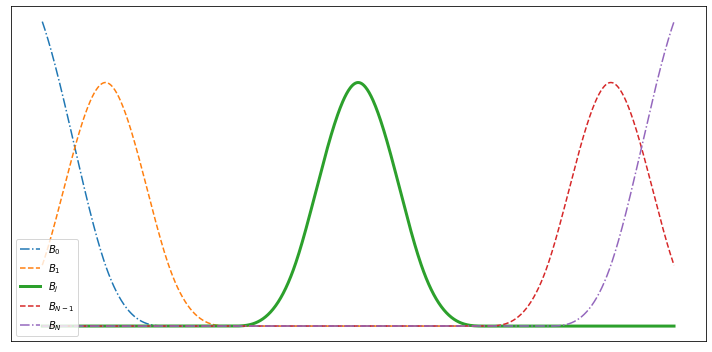

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

b0 = final_basis_normal(0, x, h, N, x0)
b1 = final_basis_normal(1, x, h, N, x0)

bj = final_basis_normal(5, x, h, N, x0)

bN_1 = final_basis_normal(N-2, x, h, N, x0)
bN = final_basis_normal(N-1, x, h, N, x0)

ax.plot(x, b0, ls="-.")
ax.plot(x, b1, ls="--")
ax.plot(x, bj, lw=3)
ax.plot(x, bN_1, ls="--")
ax.plot(x, bN, ls="-.")


ax.legend(["$B_{0}$", "$B_{1}$", "$B_{j}$", "$B_{N-1}$", "$B_{N}$"], loc="lower left")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
fig.tight_layout()
plt.show()

In [11]:
#fig.savefig("../images/all_cubic_compact_support_basis")

# 2D basis

In [12]:
x0 = -3
xN = 3
N = 8

X, h = np.linspace(x0, xN, N, retstep=True)
x = np.linspace(x0, xN, 1_000)

In [13]:
IX, IY = np.meshgrid(X, X, indexing="ij")

In [14]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

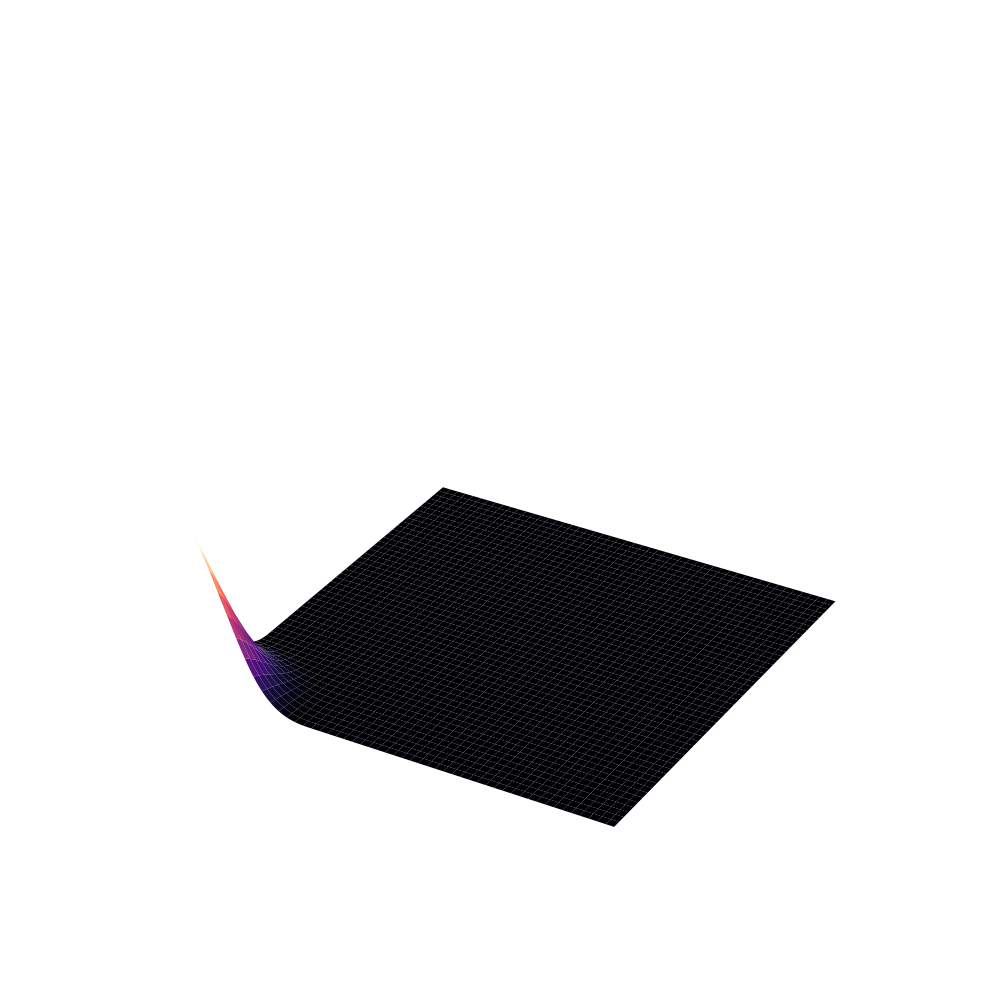

In [15]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

b43 = np.outer(final_basis_normal(4, x, h, N, x0),
              final_basis_normal(3, x, h, N, x0))

b00 = np.outer(final_basis_normal(0, x, h, N, x0),
              final_basis_normal(0, x, h, N, x0))

b00 = np.outer(final_basis_normal(0, x, h, N, x0),
              final_basis_normal(0, x, h, N, x0))

b04 = np.outer(final_basis_normal(0, x, h, N, x0),
              final_basis_normal(4, x, h, N, x0))

b46 = np.outer(final_basis_normal(4, x, h, N, x0),
              final_basis_normal(6, x, h, N, x0))


ax.plot_surface(xx, yy, b00, cmap='magma')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])

ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')

plt.show()

In [16]:
#fig.savefig("../images/two_dimensional_basis_1", dpi=200, transparent=True)

In [17]:
x0 = -3
N = 10
X, h = np.linspace(x0, 3, N, retstep=True)
x = np.linspace(x0, 3, 1000)

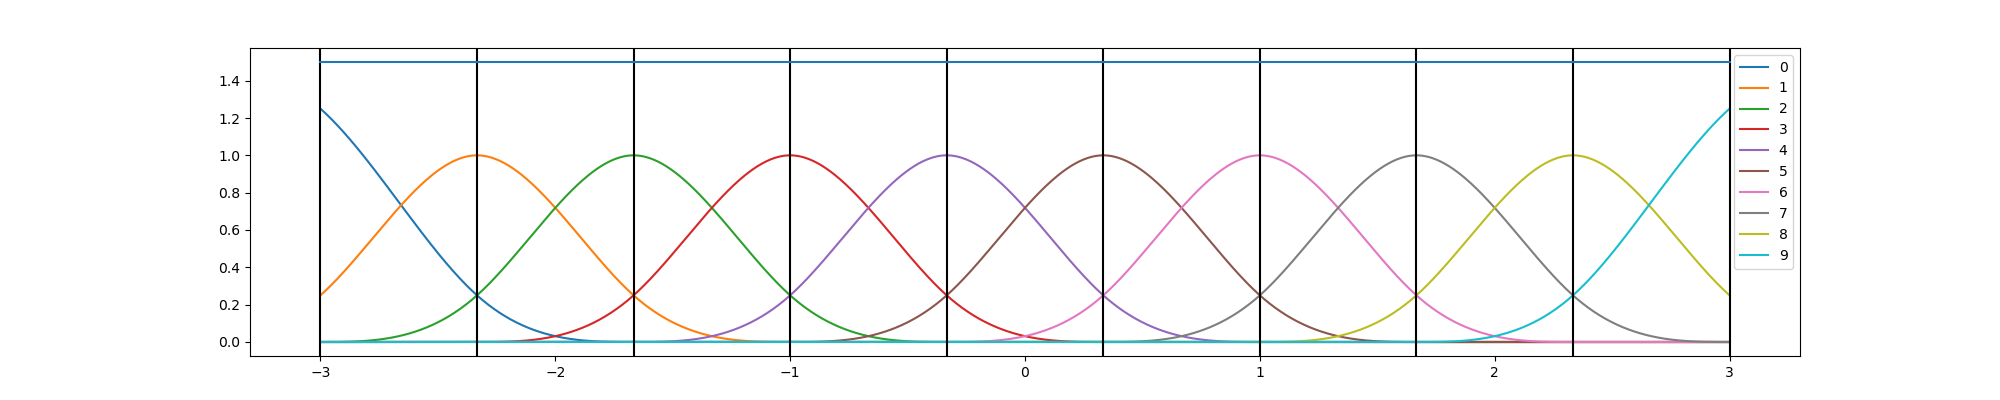

In [18]:
fig, ax = plt.subplots(figsize=(20, 4))
f = np.zeros_like(x)

for j in range(0, N):
    ax.plot(x, final_basis_normal(j, x, h, N, x0))
    f += final_basis_normal(j, x, h, N, x0)

for xx in X:
    ax.axvline(x=xx, color="black")

ax.plot(x, f)
ax.legend([f"{j}" for j in range(N)])
plt.show()

# 1D Interpolation Example

In [31]:
Y = np.sin(X)

In [32]:
n_points = X.shape[0]
matrix = np.zeros((n_points, n_points))
matrix += np.eye(n_points) + 0.25 * np.eye(n_points, k=1) + 0.25 *np.eye(n_points, k=-1)

In [33]:
matrix[+0, +0] = 1.25
matrix[-1, -1] = 1.25

In [34]:
c = np.linalg.solve(matrix, Y)

In [35]:
f_bar = np.zeros_like(x)

for j in range(n_points):
    f_bar += c[j] * final_basis_normal(j, x, h, N, x0)

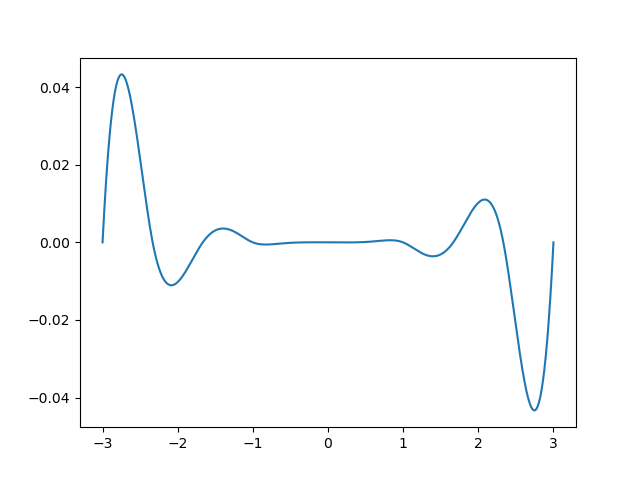

In [36]:
fig, ax = plt.subplots()
ax.plot(x, f_bar-np.sin(x))
plt.show()

# Single basis

In [41]:
IX, IY = np.meshgrid(X, X, indexing="ij")

In [42]:
IZ = np.sin(IX)*np.cos(IY)

In [43]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

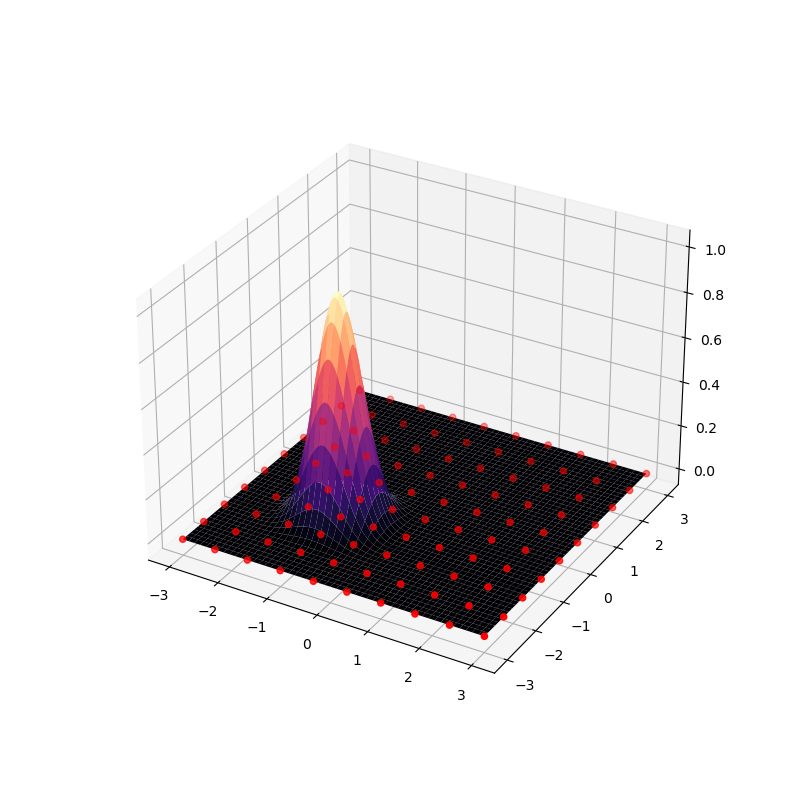

In [44]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
zz = np.outer(final_basis_normal(3, x, h, N, x0),
              final_basis_normal(3, x, h, N, x0))
ax.plot_surface(xx, yy, zz, cmap='magma')
ax.scatter(IX, IY, IZ*0, color="red")
plt.show()

# 2D interpolation example

In [45]:
x0 = 0
N = 10
X, h = np.linspace(x0, 3, N, retstep=True)
x = np.linspace(x0, 3, 100)

In [46]:
IX, IY = np.meshgrid(X, X, indexing="ij")
IZ = np.sin(IX)*np.cos(IY)

In [47]:
n_points = X.shape[0]
b = IZ.flatten()
matrix = np.zeros((n_points**2, n_points**2), dtype=np.float32)

In [48]:
for i in range(n_points**2):
    idx = np.unravel_index(i, (n_points, n_points))
    tmp = np.zeros((n_points, n_points))
    
    tmp[idx] = 1
    
    #Multiply edges by 1.25
    if (idx[0] == 0): 
        tmp[idx] *= 1.25
    if (idx[1] == 0):
        tmp[idx] *= 1.25
    if (idx[0] == n_points-1):
        tmp[idx] *= 1.25
    if (idx[1] == n_points-1):
        tmp[idx] *= 1.25
    
    if idx[0]+1 <= n_points-1:
        tmp[idx[0]+1, idx[1]] = 1/4
    
    if idx[1]+1 <= n_points-1:
        tmp[idx[0], idx[1]+1] = 1/4
    
    if idx[0]-1 >= 0:
        tmp[idx[0]-1, idx[1]] = 1/4
        
    if idx[1]-1 >= 0:
        tmp[idx[0], idx[1]-1] = 1/4
    
    if (idx[0]+1 <= n_points-1) and (idx[1]+1 <= n_points-1):
        tmp[idx[0]+1, idx[1]+1] = 1/16
    
    if (idx[0]+1 <= n_points-1) and (idx[1]-1 >= 0):
        tmp[idx[0]+1, idx[1]-1] = 1/16
    
    if (idx[0]-1 >= 0) and (idx[1]-1 >= 0):
        tmp[idx[0]-1, idx[1]-1] = 1/16
        
    if (idx[0]-1 >= 0) and (idx[1]+1 <= n_points-1):
        tmp[idx[0]-1, idx[1]+1] = 1/16
        
    #Multiply edge line's by 1.25
    if (idx[0] == 0) or (idx[0] == n_points - 1):
        if idx[1] + 1 <= n_points - 1:
            tmp[idx[0], idx[1] + 1] *= 1.25
        if idx[1] - 1 >= 0:
            tmp[idx[0], idx[1] - 1] *= 1.25

    if (idx[1] == 0) or (idx[1] == n_points - 1):
        if idx[0] + 1 <= n_points - 1:
            tmp[idx[0] + 1, idx[1]] *= 1.25
        if idx[0] - 1 >= 0:
            tmp[idx[0] - 1, idx[1]] *= 1.25
            
    matrix[i] = tmp.flatten()

In [49]:
c = np.linalg.solve(matrix, b)

In [50]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

In [51]:
for i in range(0, IX.shape[0]):
    for j in range(0, IY.shape[0]):
        
        x_part = final_basis_normal(i, x, h, N, x0)
        y_part = final_basis_normal(j, x, h, N, x0)
        
        zz = zz + c[i*(n_points)+j] * np.outer(x_part, y_part)

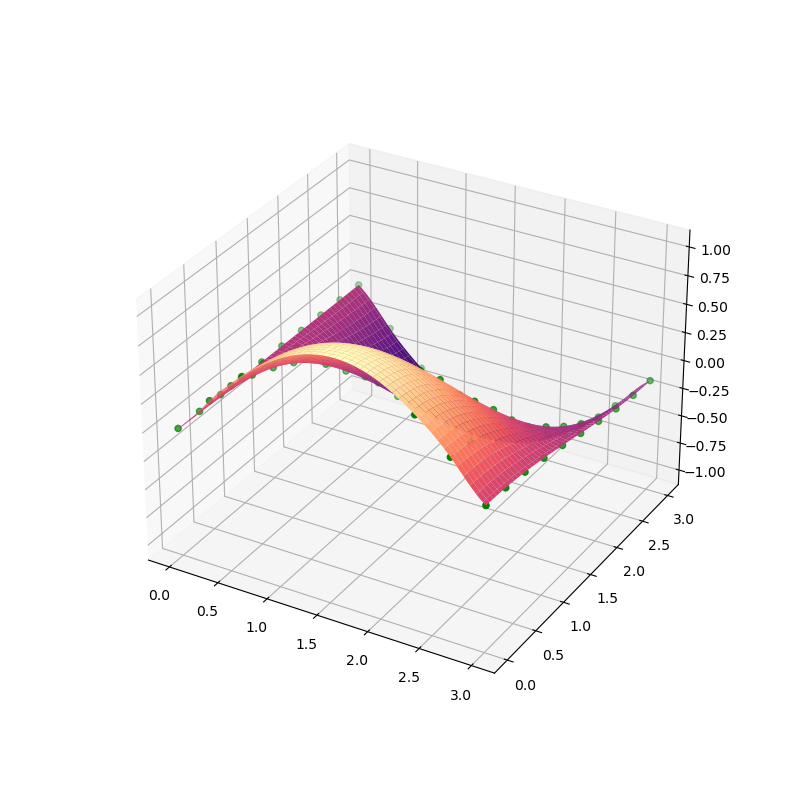

In [52]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, zz, cmap='magma')
# ax.set_zlim(0, 3)

ax.scatter(IX, IY, IZ, color="green")
plt.show()